In [17]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('./Billionaire.csv')
df = data.copy()

print("Data's shape: {}".format(df.shape))
display(df.head())


Data's shape: (2755, 7)


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [18]:
print("Percentage of missing data:\n{}".format(df.isna().sum()/len(data)*100))

# drop NaN value
df = df.dropna()

# remove $ and B in Networth column and convert to float datatype
df.NetWorth = df.NetWorth.str.strip('$')
df.NetWorth = df.NetWorth.str.strip('B')
df.NetWorth = df.NetWorth.astype('float64')

display(df.head())


Percentage of missing data:
Name        0.000000
NetWorth    0.000000
Country     0.000000
Source      0.000000
Rank        0.000000
Age         2.867514
Industry    0.000000
dtype: float64


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


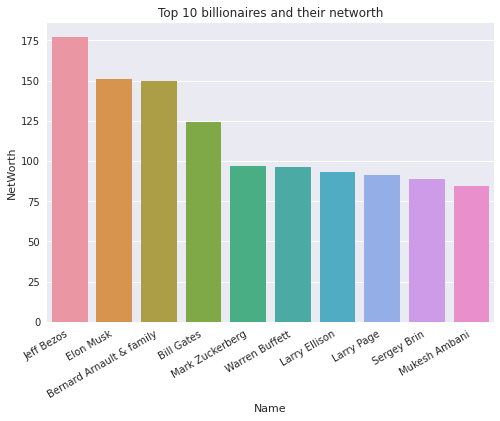

In [19]:
# Top 10 Billionaires and their NetWorth
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

top10 = df.sort_values(by='NetWorth', ascending=False, axis=0).head(10)
display(top10)

ax = sns.barplot(data=top10, x='Name', y='NetWorth')
ax.tick_params(axis='x', rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.title('Top 10 billionaires and their networth')
plt.savefig('top10.png',dpi=300)
plt.show()


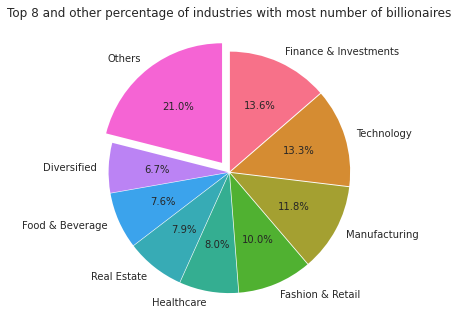

In [20]:
top_industry = df.Industry.value_counts()

other = top_industry.iloc[8:].sum()
top_industry = top_industry[:8]
top_industry.loc['Others'] = other

explode = (len(top_industry)-1) * [0.01]
explode.append(0.1)

plt.pie(top_industry,
        autopct='%.1f%%',
        # shadow=True,
        startangle=90,
        counterclock=False,
        explode=explode,
        labels=top_industry.index,
        colors=sns.color_palette("husl", 9))

plt.title("Top 8 and other percentage of industries with most number of billionaires")
plt.savefig('top8industries.png', dpi=300)
plt.show()


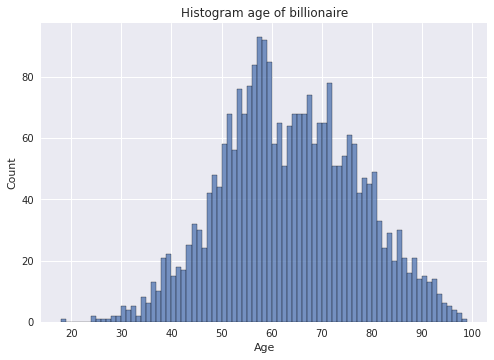

In [21]:
bin = df.Age.max()-df.Age.min()
sns.histplot(data=df, x='Age', bins=bin.astype('int64'))
plt.title('Histogram age of billionaire')
plt.savefig('agehistogram.png', dpi=300)
